# Star Wars Survey. 

This project contains data cleaning and exploring snippets for Star Wars survey data. The data was collected by the team at [FiveThirtyEight](http://fivethirtyeight.com/) in order to answer some interesting questions about Star Wars. Particular answer they were looking for was the question: **does the rest of America realize that "The Empire Strikes Back" is clearly the best of the bunch?**

In order to answer this question they conducted a survey using SurveyMonkey online tool. They were able to collect 835 responses, which can be accessed via [this link](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

Let's get started

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import IPython.display

star_wars = pd.read_csv('data/star_wars.csv', encoding='ISO-8859-1')
display(star_wars.head())

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Removing rows where *RespondentID* is null

In [3]:
star_wars = star_wars[pd.notnull(star_wars.RespondentID)]

## Cleaning and Mapping Yes/No

In [4]:
star_wars.iloc[:5, 1:3]

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,Yes,Yes
2,No,NaN
3,Yes,No
4,Yes,Yes
5,Yes,Yes


These two cols contain Yes, No and null values, we will convert these cols so that they contain boolean values and NaN. For that we will create a dictionary and map it to cols.

In [5]:
yes_no = {
    "Yes": True,
    "No": False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)


In [6]:
star_wars.iloc[:5, 1:3]

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,True,True
2,False,NaN
3,True,False
4,True,True
5,True,True


## Cleaning and Mapping Checkbox cols. 

There is a question in survey that asks whether a respondent has seen a particular movie in Star Wars series, and the options are given in checkbox form. Here are the checkbox options:

- Which of the following Star Wars films have you seen? Please select all that apply.** - Whether or not the respondent saw Star Wars: **Episode I The Phantom Menace.**
- Unnamed: 4 - Whether or not the respondent saw Star Wars: **Episode II Attack of the Clones.**
- Unnamed: 5 - Whether or not the respondent saw Star Wars: **Episode III Revenge of the Sith.**
- Unnamed: 6 - Whether or not the respondent saw Star Wars: **Episode IV A New Hope.**
- Unnamed: 7 - Whether or not the respondent saw Star Wars: **Episode V The Empire Strikes Back.**
- Unnamed: 8 - Whether or not the respondent saw Star Wars: **Episode VI Return of the Jedi.**

If the response is the name of the Movie, that means that the respondent has seen this movie, if it is null, then either the respondent did not see, or did not answer. We will assume the former. 

Now, We will rename the col names to respective **Episode Names**, and convert values inside those cols into bool. 

In [7]:
# Renaming cols. 
episodes = star_wars.iloc[:1,3:9].iloc[0]
cols = star_wars.columns[3:9].tolist()
cols_dict = {}
for i in range(0,6):
    cols_dict[cols[i]] = 'seen_{}'.format(i+1)

# Mapping col names
star_wars = star_wars.rename(columns=cols_dict)

We will create a loop that changes values in above cols to boolean expressions. 

In [8]:
for i in range(0,6):
    star_wars['seen_{}'.format(i+1)] = star_wars['seen_{}'.format(i+1)].map({
        episodes[i]: True, 
        np.nan: False
    })

## Cleaning the Ranking Cols. 



In [9]:
star_wars.iloc[:5, 9:15]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3


First, we will convert the values in these cols into numeric for better analysis. 

In [10]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

We will also change col names to more descriptive:
- ranking_1,
- ranking_2,
- etc

In [11]:
cols_9_15 = star_wars.columns[9:15].tolist()
col_dict = {}

for i in range(0,6):
    col_dict[cols_9_15[i]] = 'ranking_{}'.format(i+1)

star_wars = star_wars.rename(columns=col_dict)

## Finding the Highest-Ranked Movie

Now we have cols for rankings, we can find the most favorite movie by respondents. We can use df.mean() to calculate the average rankings. 

*Note: The lower the ranking, the better the movie*

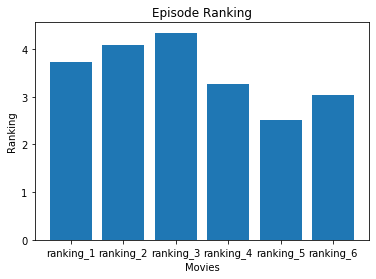

In [12]:
average_ranks = star_wars.iloc[:,9:15].mean()
movie_ranks = average_ranks.index.tolist()

N = 6
ind = np.arange(N)
fig, ax = plt.subplots()
ax.bar(ind, average_ranks)
ax.set_ylabel('Ranking')
ax.set_xlabel('Movies')
ax.set_xticks(ind)
ax.set_xticklabels(movie_ranks)
ax.set_title('Episode Ranking')
plt.show()

Episode 5 was the highest rated, while 3 was the lowest rated movie of star wars series. Episodes6 and 4 were very close to one another. 

## Finding Most Viewed Movie

We can find the most viewed movie by calculating the sum of True values in seen cols. 

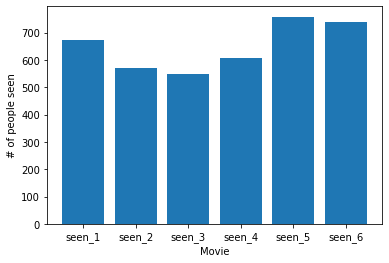

In [13]:
seen_cols = star_wars.iloc[:, 3:9].sum()
cols = star_wars.columns[3:9]
n = 6
ind = np.arange(n)
fig, ax = plt.subplots()
ax.bar(ind, seen_cols)
ax.set_ylabel('# of people seen')
ax.set_xticklabels(cols)
ax.set_xticks(ind)
ax.set_xlabel('Movie')
plt.show()

So Most viewed movie was Episode V: The Empire Strikes Back.. Least watched was Revenge of the Sith.

Most viewed movie was ranked highest, and the least viewed movie was ranked lowest. It is interesting to see this correlation. Does that mean that people were repulsed by low rating of the Episode 3, or is it lower rated because fewer people actually watched it? 

It is sane to say that the only people who ranked these movies are the ones who actuallt seen them. That's why, Episode 5 seems to be favorite for the ones who actually saw them. 

# Exploring the Data by Binary Segments

After we found out the highest ranked movie overall, lets find out what is the favorite ones for a particular segment. In our dataset, we have a gender col. We could seperate and find rankings and # of seen by gender

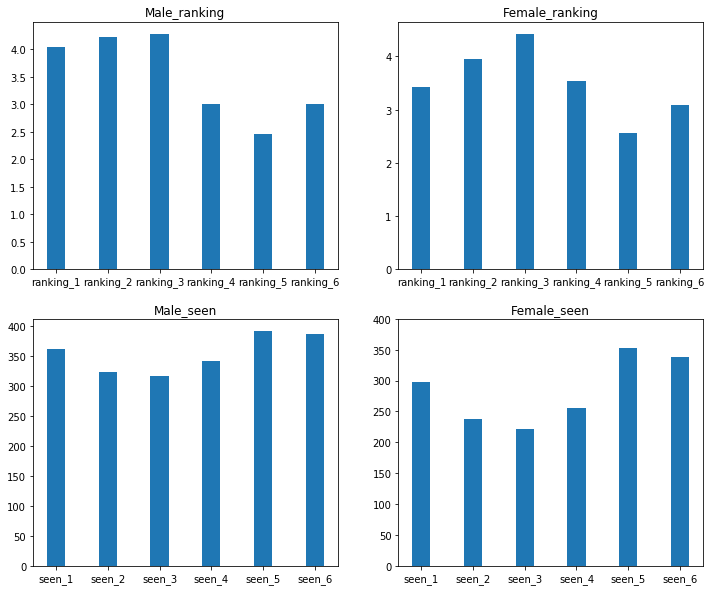

In [14]:
# Redoing analysis on males_only dataframe
males = star_wars[star_wars['Gender']=='Male']
male_ranking = males.iloc[:, 9:15].mean()
male_seen = males.iloc[:, 3:9].sum()


females = star_wars[star_wars['Gender']=='Female']
female_ranking = females.iloc[:, 9:15].mean()
female_seen = females.iloc[:, 3:9].sum()

n = 6
ind = np.arange(n)
fig, axs = plt.subplots(2,2, figsize=(12,10))
axs[0,0].bar(ind, male_ranking, .35)
axs[0,0].set_xticks(ind)
axs[0,0].set_xticklabels(movie_ranks) 
axs[0,0].set_title('Male_ranking')

axs[1,0].bar(ind, male_seen, .35)
axs[1,0].set_xticks(ind)
axs[1,0].set_xticklabels(cols) 
axs[1,0].set_title('Male_seen')

axs[0,1].bar(ind, female_ranking, .35)
axs[0,1].set_xticks(ind)
axs[0,1].set_xticklabels(movie_ranks) 
axs[0,1].set_title('Female_ranking')

axs[1,1].bar(ind, female_seen, .35)
axs[1,1].set_xticks(ind)
axs[1,1].set_xticklabels(cols) 
axs[1,1].set_title('Female_seen')
axs[1,1].set_ylim(0,400)


plt.show()


## Results of Gender comparison

**Rankings**
Male and female viewers of Star Wars rank their favorites differently. Although, Episode 5 is universally acknowledged as best, the second best already gets different for both. Males Marginally prefer Episode 4 over 6, meanwhile, females prefer Episode 6 over 4. 

Episode 1 is also ranked higher among females. The least favorite two movies remain the same for both categories. 

**Number of seen**
Among respondents, Male participants seen more than females on overall perspective. The pattern though kind of repeats itself, with Episode 3 being the least watched in both groups, and 5 with most views. 

## Segment data based on Education. 

I want to see if people with Graduate degrees differ from Less than High School Degree respondents. 

In [15]:
education_list = star_wars.Education.unique().tolist()

In [16]:
ranking_education = star_wars.groupby('Education').agg(np.mean).iloc[:, -6:]
ranking_education


,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Education,,,,,,
Bachelor degree,3.828244,4.290076,4.521073,3.114504,2.309160,2.931298
Graduate degree,3.822222,4.225664,4.500000,3.199115,2.323009,2.920354
High school degree,3.802817,3.746479,4.126761,3.211268,2.873239,3.239437
Less than high school degree,5.000000,5.333333,3.666667,2.666667,1.000000,3.333333
Some college or Associate degree,3.551181,3.885827,4.102362,3.503937,2.783465,3.173228


All respondents of different education backgrounds favor Episode 5. 

## Conclusion.

Our initial question was **does the rest of America realize that "The Empire Strikes Back" is clearly the best of the bunch?**

According to our little analysis, we can confidently say that ***it is best of the bunch***

# Thank you